In [1]:
import time   # sleep 지연
import os     # folder create 
import math   # ceil

from bs4 import BeautifulSoup      # Scraping(Crawling) package
from urllib.request import urlopen # 인터넷 접속후 페이지 소스 loading
from urllib.parse import quote     # 한글 처리 함수
from urllib.error import HTTPError # HTTP Exception
from requests import get           # GET 방식 호출

from selenium import webdriver  # 크롤링 이벤트 발생
driver = webdriver.Chrome('C:/kd/chromedriver.exe')

# 페이지 열기, second: 페이지가 local 컴퓨터에 모두 로딩될때까지 기다리는 시간
def load(url, second): 
    try:
        driver.get(url)
        time.sleep(second) # Web page loading을 기다림, 초단위, 0.5: 0.5초
    except HTTPError as e:
        print(e)
        return None
    
def getbs(): # bs 객체 생성
    try:
        bs = BeautifulSoup(driver.page_source, 'html.parser') 
    except HTTPError as e:
        print(e)
        return None
    else:
        return bs    

C:\ProgramData\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  if sys.path[0] == '':


### [01] 서울 날씨/온도의 수집
- https://www.daum.net
- 서울시의 관측위치, 기온 가져오기

In [2]:
load('https://www.daum.net', 2)

<html lang="ko"><head> <meta charset="utf-8"/> <title>Daum</title> <meta content="IE=edge" http-equiv="x-ua-compatible"/> <meta content="//www.daum.net/" property="og:url"/> <meta content="website" property="og:type"/> <meta content="Daum" property="og:title"/> <meta content="no-cache" http-equiv="Pragma"/> <meta content="-1" http-equiv="Expires"/> <meta content="origin" name="referrer"/> <meta content="https://i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001" property="og:image"/> <meta content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum" property="og:description"/> <meta content="name=Daum;action-uri=//www.daum.net/;icon-uri=/favicon.ico" name="msapplication-task"/> <meta content="name=미디어다음;action-uri=//news.daum.net/;icon-uri=/media_favicon.ico" name="msapplication-task"/> <meta content="name=메일;action-uri=//mail.daum.net;icon-uri=/mail_favicon.ico" name="msapplication-task"/> <link href="https://t1.daumcdn.net/top/favicon.ico" rel="shortcut icon"/> <meta content="origin" name="refer
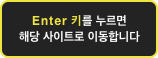

In [3]:
bs = getbs()
print(bs)

In [7]:
#daumHead > div.d_service > div > div.today_base > div > div > a > ul > li:nth-child(1) > span.txt_part
tag = bs.select('#daumHead > div.d_service > div > div.today_base > div > div > a > ul > li:nth-child(1) > span.txt_part')[0]
print(tag.text)

서울시


In [8]:
#daumHead > div.d_service > div > div.today_base > div > div > a > ul > li:nth-child(1) > strong
tag = bs.select('#daumHead > div.d_service > div > div.today_base > div > div > a > ul > li:nth-child(1) > strong')[0]
print(tag.text)

비


In [9]:
#daumHead > div.d_service > div > div.today_base > div > div > a > ul > li:nth-child(1) > span.txt_temper
tag = bs.select('#daumHead > div.d_service > div > div.today_base > div > div > a > ul > li:nth-child(1) > span.txt_temper')[0]
print(tag.text)

10
